In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [18]:

tour_spot=pd.read_csv(r"C:\Users\YB\PycharmProjects\pandasMiniProject\제주관광공사_제주관광정보시스템(VISIT JEJU)_콘텐츠_20220322.csv",encoding='cp949')
(tour_spot.shape)

(5780, 73)

In [6]:
#필요한 데이터 정제
#특정 컬럼만 가져옴
tour_spot=tour_spot.iloc[:,[1,4,7,8,9]]

#중복된 행 제거 
tour_spot.drop_duplicates(['타이틀SEO'],ignore_index=True,inplace=True)

#위도와 경도가 빠져있는 데이터 삭제 
tour_spot.dropna(axis=0,how='any',inplace=True)
tour_spot



tour_spot

콘텐츠분류   타이틀SEO                          도로명주소         위도          경도
0       숙박     해피펜션             제주특별자치도 제주시 월대1길 4  33.494110  126.433780
1      음식점   탐라 뚝배기     제주특별자치도 서귀포시 표선면 표선백사로 127  33.326770  126.836690
2      음식점      토담골             제주특별자치도 제주시 간월동로 5  33.485904  126.543496
3      음식점     우유부단        제주특별자치도 제주시 한림읍 금악동길 38  33.347640  126.328260
4      관광지      공천포           제주특별자치도 서귀포시 남원읍 신례리  33.267690  126.645996
...    ...      ...                            ...        ...         ...
5579   음식점    카페아오오      제주특별자치도 서귀포시 성산읍 환해장성로 75  33.379136  126.879975
5580   음식점      샤오츠  제주특별자치도 서귀포시 성산읍 성산등용로17번길 55  33.460013  126.929950
5581   음식점     옵써빵집     제주특별자치도 서귀포시 표선면 표선동서로 240  33.325176  126.832586
5582   음식점  바램목장&카페     제주특별자치도 서귀포시 안덕면 신화역사로 611  33.311549  126.352635
5583   음식점      중문정           제주특별자치도 서귀포시 상예로 226  33.264770  126.393652

[4779 rows x 5 columns]

In [7]:
#콘텐츠 분류 행이 숙소,쇼핑인 곳을 삭제 
tour_spot=tour_spot.loc[~tour_spot['콘텐츠분류'].isin(['숙박','쇼핑'])]
tour_spot

콘텐츠분류   타이틀SEO                          도로명주소         위도          경도
1      음식점   탐라 뚝배기     제주특별자치도 서귀포시 표선면 표선백사로 127  33.326770  126.836690
2      음식점      토담골             제주특별자치도 제주시 간월동로 5  33.485904  126.543496
3      음식점     우유부단        제주특별자치도 제주시 한림읍 금악동길 38  33.347640  126.328260
4      관광지      공천포           제주특별자치도 서귀포시 남원읍 신례리  33.267690  126.645996
5      음식점     명당양과                    제주시 원노형로 83  33.481274  126.485010
...    ...      ...                            ...        ...         ...
5579   음식점    카페아오오      제주특별자치도 서귀포시 성산읍 환해장성로 75  33.379136  126.879975
5580   음식점      샤오츠  제주특별자치도 서귀포시 성산읍 성산등용로17번길 55  33.460013  126.929950
5581   음식점     옵써빵집     제주특별자치도 서귀포시 표선면 표선동서로 240  33.325176  126.832586
5582   음식점  바램목장&카페     제주특별자치도 서귀포시 안덕면 신화역사로 611  33.311549  126.352635
5583   음식점      중문정           제주특별자치도 서귀포시 상예로 226  33.264770  126.393652

[3432 rows x 5 columns]

In [8]:
tour_spot.set_index('타이틀SEO',inplace=True)
tour_spot

콘텐츠분류                          도로명주소         위도          경도
타이틀SEO                                                             
탐라 뚝배기    음식점     제주특별자치도 서귀포시 표선면 표선백사로 127  33.326770  126.836690
토담골       음식점             제주특별자치도 제주시 간월동로 5  33.485904  126.543496
우유부단      음식점        제주특별자치도 제주시 한림읍 금악동길 38  33.347640  126.328260
공천포       관광지           제주특별자치도 서귀포시 남원읍 신례리  33.267690  126.645996
명당양과      음식점                    제주시 원노형로 83  33.481274  126.485010
...       ...                            ...        ...         ...
카페아오오     음식점      제주특별자치도 서귀포시 성산읍 환해장성로 75  33.379136  126.879975
샤오츠       음식점  제주특별자치도 서귀포시 성산읍 성산등용로17번길 55  33.460013  126.929950
옵써빵집      음식점     제주특별자치도 서귀포시 표선면 표선동서로 240  33.325176  126.832586
바램목장&카페   음식점     제주특별자치도 서귀포시 안덕면 신화역사로 611  33.311549  126.352635
중문정       음식점           제주특별자치도 서귀포시 상예로 226  33.264770  126.393652

[3432 rows x 4 columns]

In [9]:
tour_spot['콘텐츠분류'].unique()

array(['음식점', '관광지', '축제/행사', '테마여행'], dtype=object)

In [10]:
print(tour_spot.shape,len(tour_spot.index))

(3432, 4) 3432


In [11]:
tour_spot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3432 entries, 탐라 뚝배기 to 중문정
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   콘텐츠분류   3432 non-null   object 
 1   도로명주소   3432 non-null   object 
 2   위도      3432 non-null   float64
 3   경도      3432 non-null   float64
dtypes: float64(2), object(2)
memory usage: 134.1+ KB


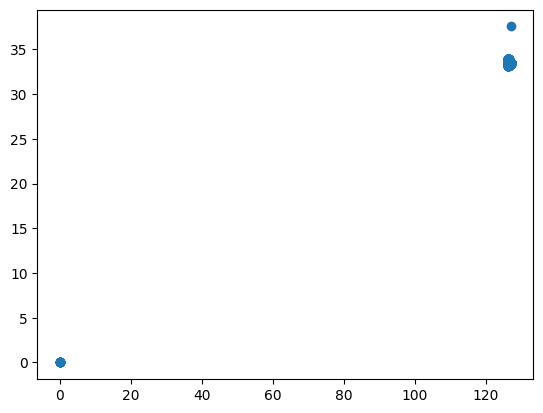

In [12]:
plt.scatter(x=tour_spot["경도"], y=tour_spot["위도"])

In [13]:
tour_spot.loc[tour_spot['콘텐츠분류']=='관광지']

콘텐츠분류                          도로명주소         위도  \
타이틀SEO                                                                
공천포                   관광지           제주특별자치도 서귀포시 남원읍 신례리  33.267690   
제주민속촌                 관광지  제주특별자치도 서귀포시 표선면 민속해안로 631-34  33.322260   
제주빅볼랜드                관광지        제주특별자치도 제주시 애월읍 산록서로 15  33.365943   
마오름(맞보기)(안덕)          관광지          제주특별자치도 서귀포시 안덕면 산록남로  33.325733   
과오름(큰오름, 샛오름, 말젯오름)   관광지        제주특별자치도 제주시 애월읍 곽지리 산 1  33.446578   
...                   ...                            ...        ...   
도치돌 알파카목장             관광지       제주특별자치도 제주시 애월읍 도치돌길 293  33.410242   
옥돔마을                  관광지     제주특별자치도 서귀포시 남원읍 남태해안로 508  33.288380   
솔담한방병원                관광지         제주특별자치도 제주시 1100로 3055  33.459203   
서귀포 하영올레              관광지           제주특별자치도 서귀포시 중앙로 105  33.254092   
세화소품관                 관광지  제주특별자치도 제주시 구좌읍 해맞이해안로 1422-3  33.525585   

                             경도  
타이틀SEO                           
공천포                  126.645996  
제주민속촌                126.842010  
제주빅볼랜드               126.356440  
마오름(맞보기)(안덕)         126.400130  
과오름(큰오름, 샛오름, 말젯오름)  126.323880  
...                         ...  
도치돌 알파카목장            126.366034  
옥돔마을                 126.751010  
솔담한방병원               126.485033  
서귀포 하영올레             126.560194  
세화소품관                126.857703  

[1233 rows x 4 columns]

In [14]:
jeju_map = folium.Map(location=[33.4,126.5],zoom_start=11)
jeju_map

In [15]:
tour_spot.index

Index(['탐라 뚝배기', '토담골', '우유부단', '공천포', '명당양과', '제주민속촌', '제주빅볼랜드',
       '마오름(맞보기)(안덕)', '땅꼬분식 뷔페', '과오름(큰오름, 샛오름, 말젯오름)',
       ...
       '인그리드', '카페유주', '다래향 세화점', '바보라면', '못잊어 감자탕', '카페아오오', '샤오츠', '옵써빵집',
       '바램목장&카페', '중문정'],
      dtype='object', name='타이틀SEO', length=3432)

In [16]:

for spot in tour_spot.index:
    
    popup_name=str(spot)+'-'+str(tour_spot.loc[spot,'도로명주소'])
    
    if str(tour_spot.loc[spot, '콘텐츠분류']) =='관광지':
        icon_color = '#FF0000'#빨강
    
    elif str(tour_spot.loc[spot, '콘텐츠분류']) =='음식점':
        icon_color = '#009300'#초록
        
    elif str(tour_spot.loc[spot, '콘텐츠분류']) =='축제/행사':
        icon_color = '#5F00FF'#파랑
        
    else :
        icon_color = '#191919'#검정
        
    folium.features.CircleMarker(
        location=[tour_spot.loc[spot, '위도'],tour_spot.loc[spot, '경도']],
        popup=f'<pre>{popup_name}</pre>',
        radius=10,
        fill=True,
        fill_color=icon_color,
        
    ).add_to(jeju_map)

jeju_map